<a href="https://colab.research.google.com/github/manasamadgul/Pytorch_Fundamentals/blob/main/Classifier_DogOrCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#id first_training
#caption Results from the first training
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(192))

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 135MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.204730,0.043139,0.013532,00:45


epoch,train_loss,valid_loss,error_rate,time
0,0.075507,0.030758,0.010825,00:44
1,0.039076,0.048629,0.011502,00:41
2,0.019368,0.025012,0.010825,00:42


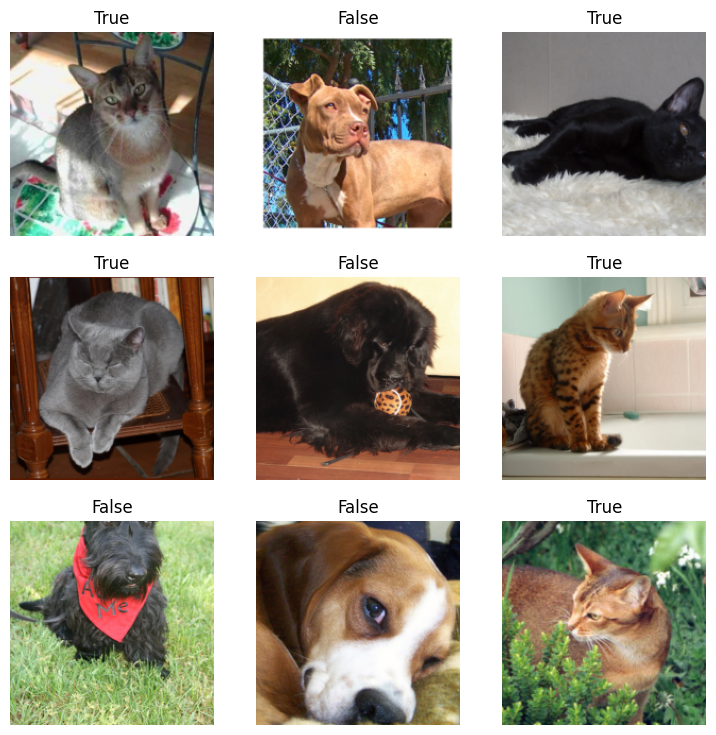

In [3]:
dls.show_batch()


In [ ]:
from fastai.vision.widgets import ImageClassifierCleaner

cleaner = ImageClassifierCleaner(learn)
cleaner


In [ ]:
learn.path = Path()
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [11]:
#hide_output
import ipywidgets as widgets # Import the ipywidgets module and alias it as 'widgets'

uploader = widgets.FileUpload()
uploader


FileUpload(value={}, description='Upload')

In [12]:
learn_inf.predict(uploader.data[0])


('True', tensor(1), tensor([2.9118e-15, 1.0000e+00]))

In [13]:
learn_inf.dls.vocab


[False, True]

In [14]:
labels = learn.dls.vocab
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}


In [ ]:
from fastai.vision.all import *
import io
im = Image.open(io.BytesIO(uploader.data[0]))
im.to_thumb(256,256)

In [ ]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")
